# Image Recognition


## 1. Get the data

Dataset of the images taken over here to work with are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. 

To begin, Let's only consider two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

Let's download the `pizza_steak` subset .zip file and unzip it.

In [2]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

## Inspect the data

let's inspect the downloaded data.

File Structure:
* A `train` directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
* A `test` directory with the same structure as the `train` directory.

```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   Set of JPG Images
│   │   │   ...      
│   └───steak
│       │   Set of JPG Images
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   Set of JPG Images
│   │   │   ...      
│   └───steak
│       │   Set of JPG Images
│       │   ...    
 ```

Let's take a look at how many images are there in the each folder.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Number of Sub-directories: {len(dirnames)} || Number of Images: {len(filenames)} || Path: '{dirpath}'.")

Number of Sub-directories: 2 || Number of Images: 0 || Path: 'pizza_steak'.
Number of Sub-directories: 2 || Number of Images: 0 || Path: 'pizza_steak/test'.
Number of Sub-directories: 0 || Number of Images: 250 || Path: 'pizza_steak/test/steak'.
Number of Sub-directories: 0 || Number of Images: 250 || Path: 'pizza_steak/test/pizza'.
Number of Sub-directories: 2 || Number of Images: 0 || Path: 'pizza_steak/train'.
Number of Sub-directories: 0 || Number of Images: 750 || Path: 'pizza_steak/train/steak'.
Number of Sub-directories: 0 || Number of Images: 750 || Path: 'pizza_steak/train/pizza'.


In [ ]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


So, there is a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some images in the folders. This will help in understanding the dataset.

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


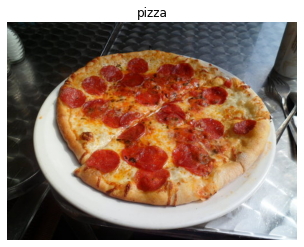

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

After going through a dozen or so images from the different classes, we can get an idea of what we're working with.

The entire Food101 dataset comprises of similar images from 101 different classes.

Here, Image Shape is an important feature that tells dimension of images currently we're working on. And by running the above cell many times it can be obcserved that **Dimension of all images are not same**. That task we need to do in the future.

In [ ]:
# View the img (as big array/tensor)
img

array([[[ 24,  24,  22],
        [ 14,  14,  12],
        [  9,   9,   7],
        ...,
        [ 76,  70,  54],
        [ 79,  73,  57],
        [ 79,  76,  59]],

       [[ 23,  23,  21],
        [ 15,  15,  13],
        [ 11,  11,   9],
        ...,
        [ 78,  71,  55],
        [ 79,  73,  57],
        [ 80,  74,  58]],

       [[ 21,  23,  20],
        [ 17,  19,  16],
        [ 12,  14,  11],
        ...,
        [ 79,  72,  56],
        [ 79,  73,  57],
        [ 78,  72,  56]],

       ...,

       [[ 23,  22,  20],
        [ 23,  22,  20],
        [ 23,  22,  20],
        ...,
        [196, 206, 215],
        [194, 204, 213],
        [193, 203, 212]],

       [[ 23,  22,  20],
        [ 22,  21,  19],
        [ 21,  20,  18],
        ...,
        [211, 221, 230],
        [209, 219, 228],
        [207, 217, 226]],

       [[ 23,  22,  20],
        [ 20,  19,  17],
        [ 18,  17,  15],
        ...,
        [220, 230, 239],
        [218, 228, 237],
        [217, 227, 236]]

Looking at the image shape more closely, it can be seen that it's in the form `(Width, Height, Colour Channels i.e. - RGB)`.

In this case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3.

It can be noticed that all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

As it is known that while working with neural network it is always a good practice to keep values between 0 and 1. That means we **need to normalise data** so that optimizers can converge faster towards minima point. 

Normalisation can be done by dividing image pixel values by 255.

In [ ]:
# Get all the pixel values between 0 & 1
img/255.0

array([[[0.09411765, 0.09411765, 0.08627451],
        [0.05490196, 0.05490196, 0.04705882],
        [0.03529412, 0.03529412, 0.02745098],
        ...,
        [0.29803922, 0.2745098 , 0.21176471],
        [0.30980392, 0.28627451, 0.22352941],
        [0.30980392, 0.29803922, 0.23137255]],

       [[0.09019608, 0.09019608, 0.08235294],
        [0.05882353, 0.05882353, 0.05098039],
        [0.04313725, 0.04313725, 0.03529412],
        ...,
        [0.30588235, 0.27843137, 0.21568627],
        [0.30980392, 0.28627451, 0.22352941],
        [0.31372549, 0.29019608, 0.22745098]],

       [[0.08235294, 0.09019608, 0.07843137],
        [0.06666667, 0.0745098 , 0.0627451 ],
        [0.04705882, 0.05490196, 0.04313725],
        ...,
        [0.30980392, 0.28235294, 0.21960784],
        [0.30980392, 0.28627451, 0.22352941],
        [0.30588235, 0.28235294, 0.21960784]],

       ...,

       [[0.09019608, 0.08627451, 0.07843137],
        [0.09019608, 0.08627451, 0.07843137],
        [0.09019608, 0

## An end-to-end example

Reading the [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), it can be seen they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

> 🤔 **Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.



## Using the same model as before

As given images have different dimensions, common practice is to reshape images all to one size. Here, we'll resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

# Data Preparation

In [ ]:
import tensorflow as tf
# from tf.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Model - 1

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 230ms/step - loss: 0.8186 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 14s 293ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


The first model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture of model.

In [ ]:
# Check out our second model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


`model_1` has 602,141 trainable parameters which is a too big number. 

Since our previous model didn't work, let's increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer. By this way we are increasing complexity of our model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 3.6024 - accuracy: 0.6027 - val_loss: 0.6127 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.8505 - accuracy: 0.6673 - val_loss: 1.2940 - val_accuracy: 0.5580
Epoch 3/5
47/47 [==============================] - 10s 208ms/step - loss: 0.6552 - accuracy: 0.7453 - val_loss: 0.5051 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.5643 - accuracy: 0.7620 - val_loss: 0.5602 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5040 - accuracy: 0.7767 - val_loss: 0.4370 - val_accuracy: 0.7980


It looks like model_2 is learning something from inputs. It got ~75% accuracy on the training set and ~75% accuracy on the validation set.

How does the architecute look?

In [ ]:
# Check out model_2 architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The number of trainable parameters has increased even more than `model_1`. And even with close to 2x more trainable parameters.

## Binary classification

Let's just define few steps to follow:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to build your own model of the data.

In this case, it can be seen that the steak images are having darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You can also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


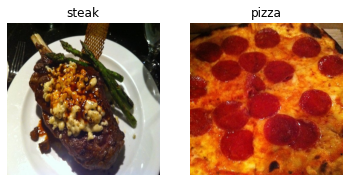

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

Here, the dataset is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into `train` and `test` directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

There are many different batch sizes that could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.


In [ ]:
# Create train and test data generators and rescale the data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps to prepare the images into batches as well as perform transformations on them as they get loaded into the model.

The `rescale` parameter performs **Normalization** along with `1/255.` by dividing all of the pixel values by 255. 

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Training dataset:1500 images belonging to 2 classes (pizza and steak) Testing dataset:500 images also belonging to 2 classes.

Some things to here:
* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines our classification problem type. If we had more than two classes, we would use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

We can take a look at our batched images and labels by inspecting the `train_data` object.

In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

It seems our images and labels are in batches of 32.

Let's see what the images look like.

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.95294124, 0.9450981 , 0.9490197 ],
          [0.8235295 , 0.81568635, 0.8196079 ],
          [0.97647065, 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

Due to our `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.

Let's check labels then.

In [ ]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'` our labels are either `0` (pizza) or `1` (steak).

Now that our data is ready, our model is going to try and figure out the patterns between the image tensors and the labels.

### 3. Create a model (start with a baseline)

To begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

In our case, let's take a smaller version of the model and build a 3 layer convolutional neural network.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid') # output layer (specify output shape)
])

We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

```
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Let's discuss some of the components of the `Conv2D` layer:

* The "`2D`" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* `filters` - number of "feature extractors" that will be moving over our images.
* `kernel_size` - the size of our filters, for example, a `kernel_size` of `(3, 3)` (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* `stride` - the number of pixels a `filter` will move across as it covers the image. A `stride` of 1 means the filter moves across each pixel 1 by 1. A `stride` of 2 means it moves 2 pixels at a time.
* `padding` - this can be either `'same'` or `'valid'`, `'same'` adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as `'valid'` (default) cuts off excess pixels where the `filter` doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

A **feature** can be considered any significant part of an image. For example, in our case, a feature might be the circular shape of pizza. Or the rough edges on the outside of a steak.

It's important to note that these **features** are not defined by a person, instead, the model learns them as it applies different filters across the image.

Now our model is ready, let's compile it.

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

Since problem is on a binary classification problem (pizza vs. steak), the `loss` function used is `'binary_crossentropy'`, if it was mult-iclass, we might use something like `'categorical_crossentropy'`.

Adam with all the default settings is our optimizer and our evaluation metric is accuracy.

### 4. Fit a model

The model is compiled, time to fit it.

New parameters here:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 222ms/step - loss: 1.7433 - accuracy: 0.6080 - val_loss: 0.5793 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4970 - accuracy: 0.7913 - val_loss: 0.4333 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3848 - accuracy: 0.8353 - val_loss: 0.4235 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.2396 - accuracy: 0.9167 - val_loss: 0.4334 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.1151 - accuracy: 0.9660 - val_loss: 0.5344 - val_accuracy: 0.8000


### 5. Evaluate the model

Looks like the model is learning something.

Let's check out its training curves.

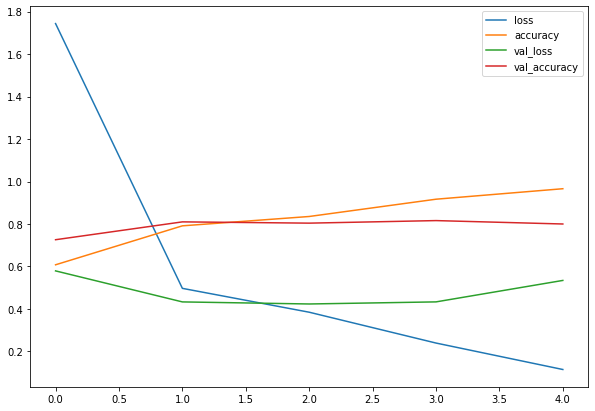

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

It looks like our model is **overfitting** the training dataset.

To inspect the model's training performance, let's separate the accuracy and loss curves.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

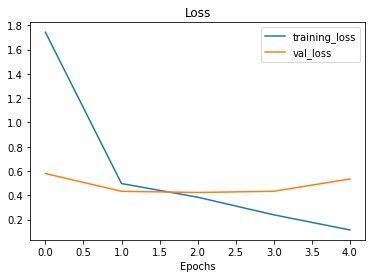

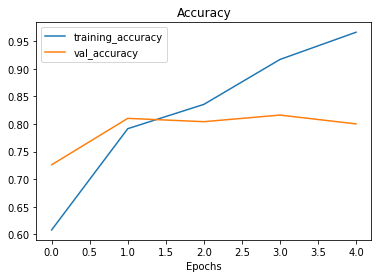

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

Here, it can be seen that the model is overfitting the dataset and there are even a few more things we could try to further overfit our model:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2), # reduce number of features by half
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

If convolutional layers learn the features of an image then Max Pooling layer can be taken as figuring out the most important of those features. 

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6071 - accuracy: 0.6653 - val_loss: 0.4555 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4680 - accuracy: 0.7867 - val_loss: 0.3889 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4357 - accuracy: 0.8027 - val_loss: 0.3750 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4147 - accuracy: 0.8187 - val_loss: 0.3430 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.3849 - accuracy: 0.8327 - val_loss: 0.3322 - val_accuracy: 0.8800


Okay, it looks like the model with max pooling (`model_5`) is performing worse on the training set but better on the validation set. That means overfitting has beem reduces significantlly. Though a way to increase accuracy and decrese overfitting need to find.

Let's check out its architecture.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

The output shape in each `MaxPooling2D` layer gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and taking the most important features and get rid of the rest.

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

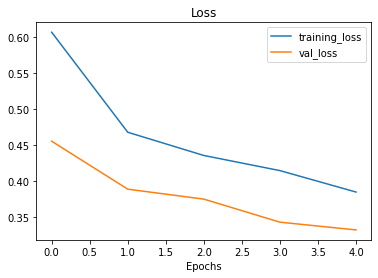

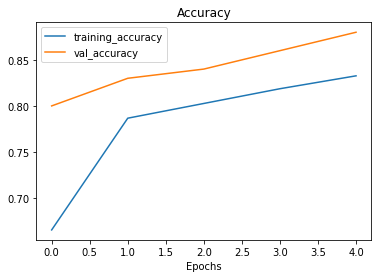

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

It can be seen that the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Let's try Data Augmentation on the model.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

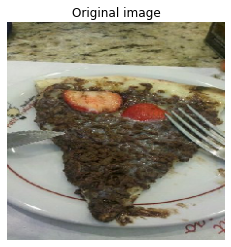

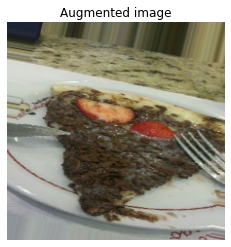

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After seeing various sample of original and augmented images, you can start to see some of the example transformations on the training images.

Data augmentation is a way to try and prevent a model overfitting. Here our model was overfitting (e.g. the validation loss keeps increasing), so data augmentation is good technique to apply.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as `model_5`.

In [ ]:
# Create the model (same as model_5)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(pool_size=2), # reduce number of features by half
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.7070 - accuracy: 0.4433 - val_loss: 0.6851 - val_accuracy: 0.5580
Epoch 2/5
47/47 [==============================] - 27s 578ms/step - loss: 0.6906 - accuracy: 0.5787 - val_loss: 0.6748 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6974 - accuracy: 0.5247 - val_loss: 0.6481 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6719 - accuracy: 0.6920 - val_loss: 0.6196 - val_accuracy: 0.7380
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6646 - accuracy: 0.6027 - val_loss: 0.5645 - val_accuracy: 0.7800


The model didn't get very good results on the training set because when creating `train_data_augmented` data shuffling was off using `shuffle=False` which means the model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

Since we only set `shuffle=False` for demonstration purposes (so we could plot the same augmented and non-augmented image), we can fix this by setting `shuffle=True` on future data generators.

You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

It can be notices that each epoch is taking long time to train on augmented data compared to non-augmented data because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

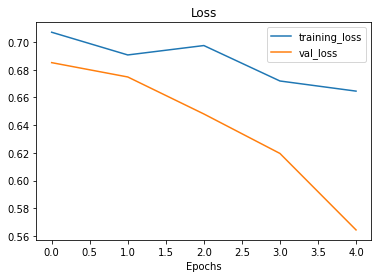

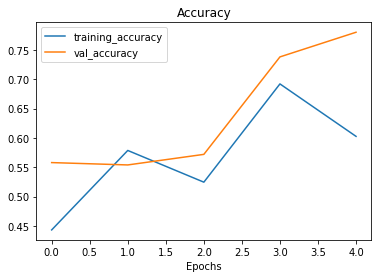

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Let's see what happens when we shuffle the augmented training data.

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6411 - accuracy: 0.6253 - val_loss: 0.4911 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 23s 480ms/step - loss: 0.5106 - accuracy: 0.7573 - val_loss: 0.3687 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.4718 - accuracy: 0.7713 - val_loss: 0.3489 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4709 - accuracy: 0.7833 - val_loss: 0.3402 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4722 - accuracy: 0.7840 - val_loss: 0.3473 - val_accuracy: 0.8800


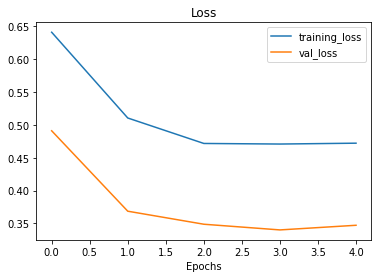

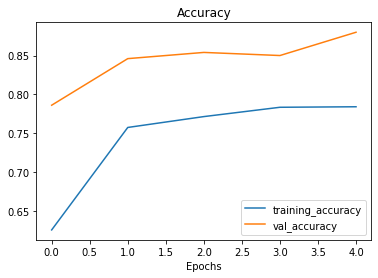

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

`model_7`'s performance on the training dataset improves almost immediately compared to `model_6`. This is because dataset is shuffled for the training data as we passed it to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, our loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

### 7. Repeat until satisified

The trained models performing pretty good for given dataset.And it can be seen that baseline model accuracy is also beaten. But there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 515ms/step - loss: 0.6970 - accuracy: 0.5127 - val_loss: 0.6896 - val_accuracy: 0.6020
Epoch 2/5
47/47 [==============================] - 25s 545ms/step - loss: 0.6603 - accuracy: 0.6127 - val_loss: 0.5427 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5504 - accuracy: 0.7260 - val_loss: 0.4364 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5200 - accuracy: 0.7660 - val_loss: 0.3969 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 23s 491ms/step - loss: 0.5091 - accuracy: 0.7680 - val_loss: 0.3602 - val_accuracy: 0.8580


Let's compare the model architecture of model-1 and the architecture of latest model model-8.

In [ ]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

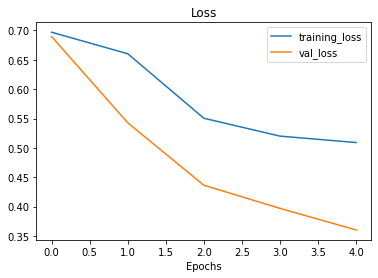

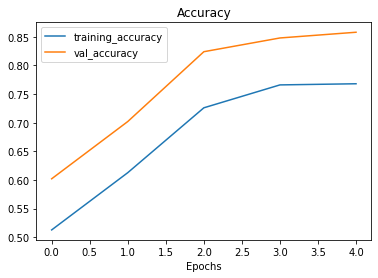

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

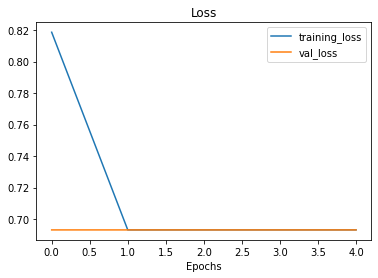

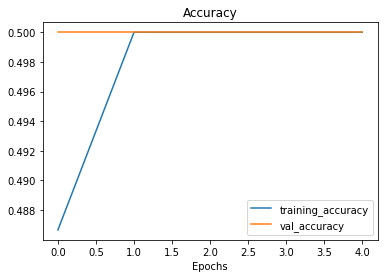

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

New training curves are looking good, but the model's performance on the training and test sets didn't improve much compared to the previous model. One thing can be done which is increasing number of epochs and get better results.

## Multi-class Classification

How about we go through those steps again, except this time, we'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

### 1. Import and become one with the data

Again, Take a subset of the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101). In addition to the pizza and steak images, pull out another eight classes.

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-26 20:00:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   183MB/s    in 2.7s    

2022-08-26 20:00:19 (183 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the `10_food_classes` file.

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And get the class names from the subdirectories.

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Now let's visualise few dataset images.

Image shape: (512, 384, 3)


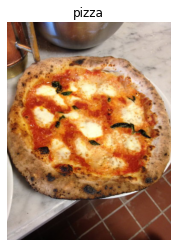

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Rescale the data and create data generator instances
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


As with binary classifcation, we've creator image generators. The main change this time is that we've changed the `class_mode` parameter to `'categorical'` because we're dealing with 10 classes of food images.

Everything else like rescaling the images, creating the batch size and target image size stay the same.

### 3. Create a model (start with a baseline)

Changes need to make:
* Changing the output layer to use have 10 ouput neurons (the same number as the number of classes we have).
* Changing the output layer to use `'softmax'` activation instead of `'sigmoid'` activation.
* Changing the loss function to be `'categorical_crossentropy'` instead of `'binary_crossentropy'`.

In [ ]:
# Create our model (a clone of model_8, except to be multi-class)
model_9 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.1389 - accuracy: 0.2249 - val_loss: 2.0421 - val_accuracy: 0.2576
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.8426 - accuracy: 0.3627 - val_loss: 1.9109 - val_accuracy: 0.3440
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.4035 - accuracy: 0.5347 - val_loss: 2.0913 - val_accuracy: 0.3184
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.7855 - accuracy: 0.7423 - val_loss: 2.6690 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 45s 191ms/step - loss: 0.2961 - accuracy: 0.9096 - val_loss: 3.8546 - val_accuracy: 0.2720


Here epochs are taking more time then in bianry classification model. The intuitive reasoning here is the more data you have, the longer a model will take to find patterns.

### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 3.8546 - accuracy: 0.2720


[3.8546390533447266, 0.2720000147819519]

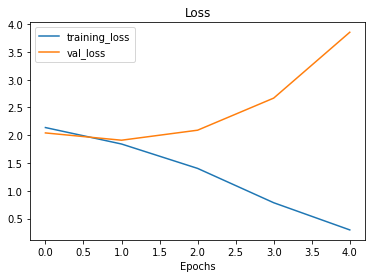

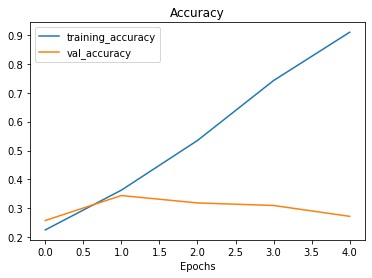

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

It seems the model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model parameters

Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

Next steps to follow and stop overfitting:

- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

Let's remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [ ]:
# Try a simplified model (removed two layers)
model_10 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.1713 - accuracy: 0.2424 - val_loss: 1.9540 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.8267 - accuracy: 0.3777 - val_loss: 1.9440 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.5366 - accuracy: 0.4923 - val_loss: 1.9737 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 43s 182ms/step - loss: 1.0768 - accuracy: 0.6600 - val_loss: 2.2019 - val_accuracy: 0.3104
Epoch 5/5
235/235 [==============================] - 47s 201ms/step - loss: 0.6127 - accuracy: 0.8151 - val_loss: 2.6548 - val_accuracy: 0.2792


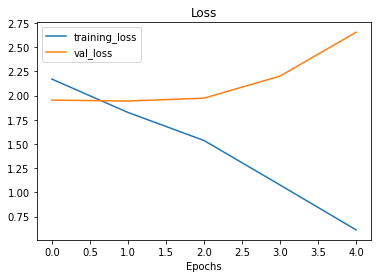

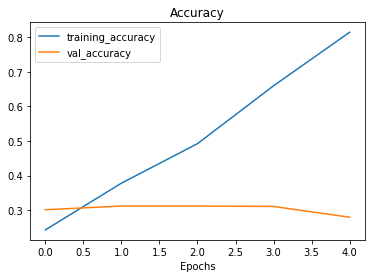

In [ ]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Now let's try data augmentation. Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


let's see how augmented data works with the same model as before (`model_10`).

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called clone_model which can take an existing model and rebuild it in the same format. 

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 480ms/step - loss: 2.2790 - accuracy: 0.1732 - val_loss: 2.1125 - val_accuracy: 0.2396
Epoch 2/5
235/235 [==============================] - 112s 477ms/step - loss: 2.1022 - accuracy: 0.2437 - val_loss: 1.9666 - val_accuracy: 0.2812
Epoch 3/5
235/235 [==============================] - 108s 459ms/step - loss: 2.0332 - accuracy: 0.2857 - val_loss: 1.9639 - val_accuracy: 0.2980
Epoch 4/5
235/235 [==============================] - 107s 457ms/step - loss: 2.0136 - accuracy: 0.2913 - val_loss: 1.8644 - val_accuracy: 0.3632
Epoch 5/5
235/235 [==============================] - 107s 457ms/step - loss: 1.9648 - accuracy: 0.3185 - val_loss: 1.8201 - val_accuracy: 0.3608


You can see it each epoch takes longer than the previous model. This is because our data is being augmented on the fly on the CPU as it gets loaded onto the GPU, in turn, increasing the amount of time between each epoch.

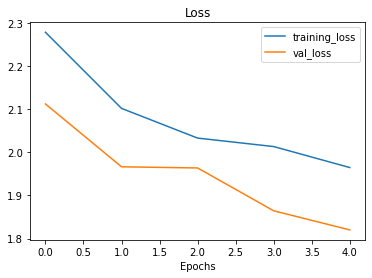

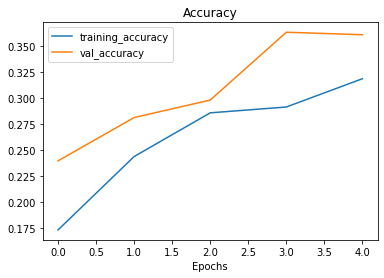

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

It looks like if number of epochs are increased then the evaluation metrics might continue to improve.